<a href="https://colab.research.google.com/github/Erickson117/Ejemplo-SVM/blob/main/Ejemplo_tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-9f5e6f0c7763>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.Paired(i / 2.), label=label)


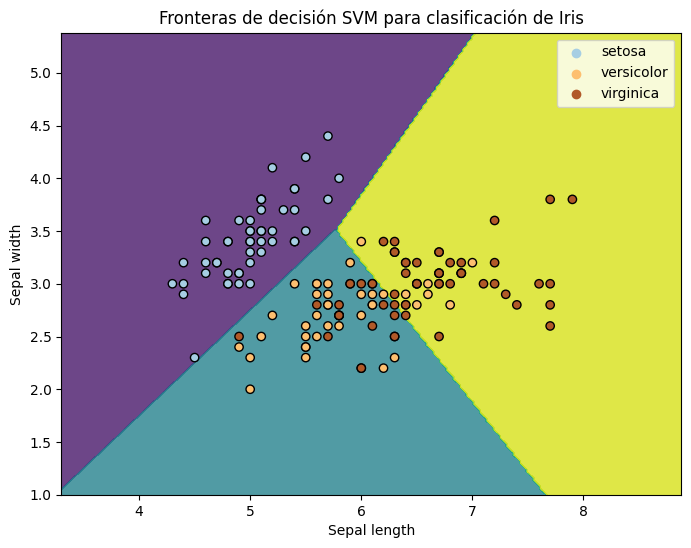

In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el conjunto de datos Iris y convertirlo en un DataFrame
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las primeras dos características para visualización
#print(X)
y = iris.target #0 setosa 1 versicolor 2 virginica
#print(y)
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df.info()
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #test_siz porcentace de datos de entrenamiento, random_state semilla para que sea igual

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Crear un meshgrid para trazar las fronteras de decisión
h = 0.02  # Tamaño del paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #ancho sepalo
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #largo sepalo
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #crea malla

# Hacer predicciones en la malla, predicciones de clase para cada punto
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear el gráfico con leyenda
plt.figure(figsize=(8, 6)) #Tamaño del grafico

# Dibujar las áreas de decisión
plt.contourf(xx, yy, Z, alpha=0.8) #alpha transparencia

# Graficar los puntos de datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# Agregar leyenda
labels = iris.target_names
for i, label in enumerate(labels):
    plt.scatter([], [], c=plt.cm.Paired(i / 2.), label=label)
plt.legend()

# Agregar etiquetas y título
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fronteras de decisión SVM para clasificación de Iris')

# Mostrar el gráfico
plt.show()

